## Final Project Submission

Please fill out:
* Student name: Huseyin Caglar
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Import Neccesary Libraries and Loading Data

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from statsmodels.stats.stattools import durbin_watson
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [56]:
cd data


[WinError 2] The system cannot find the file specified: 'data'
C:\Users\AI\Desktop\Flatiron\Phase_2\dsc-phase-2-project\data


In [57]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A0B5-0BC1

 Directory of C:\Users\AI\Desktop\Flatiron\Phase_2\dsc-phase-2-project\data

09/26/2021  03:32 PM    <DIR>          .
09/26/2021  03:32 PM    <DIR>          ..
09/16/2021  04:04 PM             1,120 column_names.md
09/16/2021  04:04 PM         2,475,934 kc_house_data.csv
               2 File(s)      2,477,054 bytes
               2 Dir(s)  383,369,306,112 bytes free


In [58]:
df = pd.read_csv('kc_house_data.csv')

In [59]:
df.shape

(21597, 21)

In [60]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Cleaning

In [61]:
#Looking for missing values.
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [62]:
#Filling missing values.
df['yr_renovated']= df['yr_renovated'].fillna(0)
df['view'] = df['view'].fillna(0.0)
df['waterfront'] = df['waterfront'].fillna(0.0)

In [63]:
#Dropping not usual columns.
df.drop(columns=['id','date','lat','long'],inplace=True)

In [64]:
#Cleaning sqft_basement column.
df.sqft_basement = df.sqft_basement.replace('?',0.0)

In [65]:
df.sqft_basement = df.sqft_basement.astype(float)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_basement'>

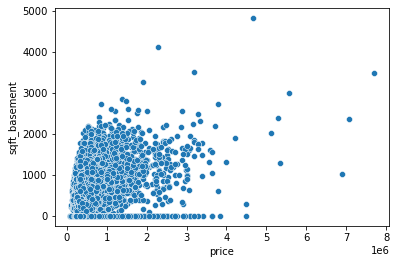

In [66]:
sns.scatterplot(df.price,df.sqft_basement)

In [67]:
df.shape

(21597, 17)

In [68]:
z = np.abs(stats.zscore(df.sqft_basement))
threshold = 3
df1 = df[(z<3)]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_basement'>

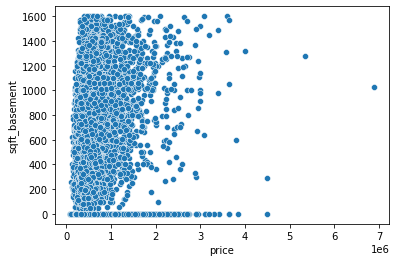

In [69]:
sns.scatterplot(df1.price,df1.sqft_basement)

In [70]:
df1 = df1.loc[df1.bedrooms<9]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

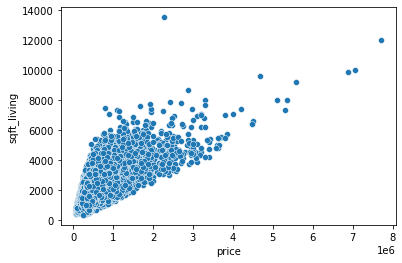

In [71]:
sns.scatterplot(df.price,df.sqft_living)

In [72]:
z = np.abs(stats.zscore(df1.sqft_living))
threshold = 3
df1 = df1[(z<3)]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_living'>

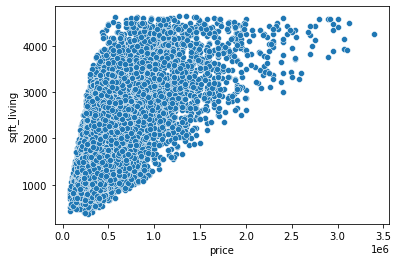

In [73]:
sns.scatterplot(df1.price,df1.sqft_living)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

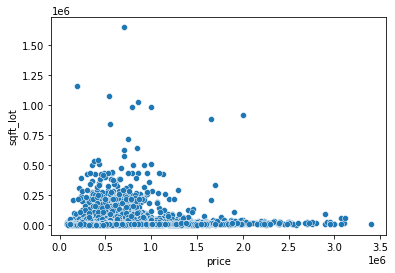

In [74]:
sns.scatterplot(df1.price,df1.sqft_lot)

In [75]:
z = np.abs(stats.zscore(df1.sqft_lot))
threshold = 3
df1 = df1[(z<3)]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

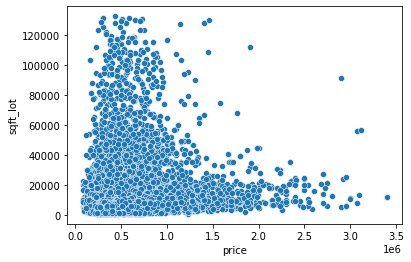

In [76]:
sns.scatterplot(df1.price,df1.sqft_lot)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='floors'>

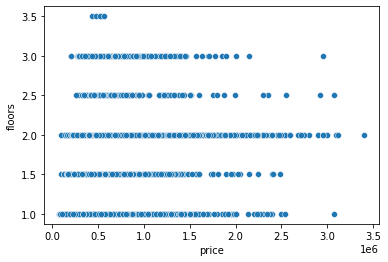

In [77]:
sns.scatterplot(df1.price,df1.floors)

In [78]:
df1 = df1.loc[df1.floors < 3]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='grade'>

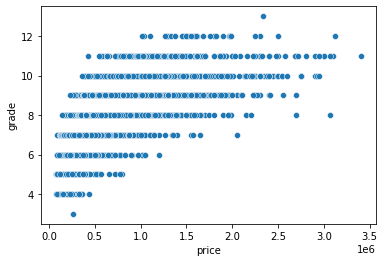

In [79]:
sns.scatterplot(df1.price,df1.grade)

In [80]:
z = np.abs(stats.zscore(df1.grade))
threshold = 3
df1 = df1[(z<3)]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='grade'>

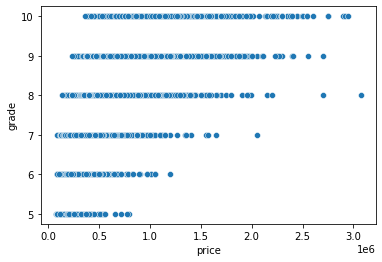

In [81]:
sns.scatterplot(df1.price,df1.grade)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='yr_built'>

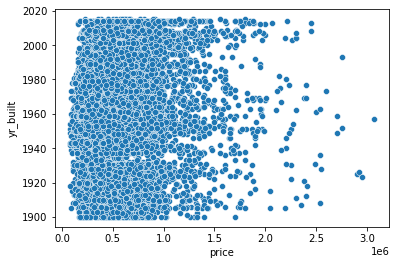

In [82]:
sns.scatterplot(df1.price,df1.yr_built)

In [83]:
z = np.abs(stats.zscore(df1.yr_built))
threshold = 3
df1 = df1[(z<3)]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='yr_built'>

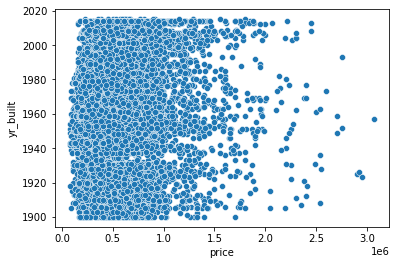

In [84]:
sns.scatterplot(df1.price,df1.yr_built)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_living15'>

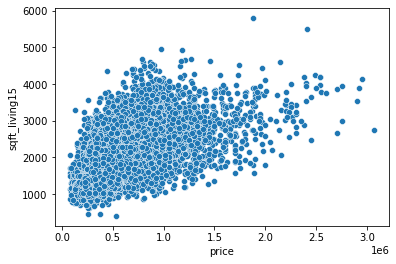

In [85]:
sns.scatterplot(df1.price,df1.sqft_living15)

In [86]:
z = np.abs(stats.zscore(df1.sqft_living15))
threshold = 3
df1 = df1[(z<3)]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_living15'>

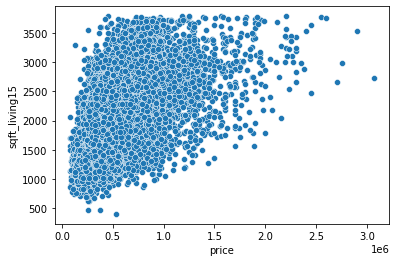

In [87]:
sns.scatterplot(df1.price,df1.sqft_living15)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_lot15'>

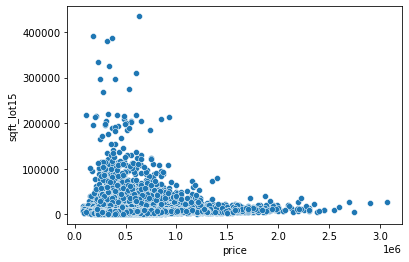

In [88]:
sns.scatterplot(df1.price,df1.sqft_lot15)

In [89]:
z = np.abs(stats.zscore(df1.sqft_lot15))
threshold = 3
df1 = df1[(z<3)]

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='sqft_lot15'>

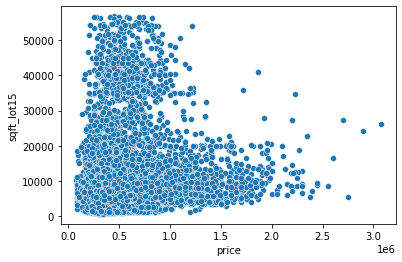

In [90]:
sns.scatterplot(df1.price,df1.sqft_lot15)

In [91]:
#Creating function to fix scientific notations.
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e10:
        s = '${:1.1f}B'.format(x*1e-10)
    elif x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-2)
    return s

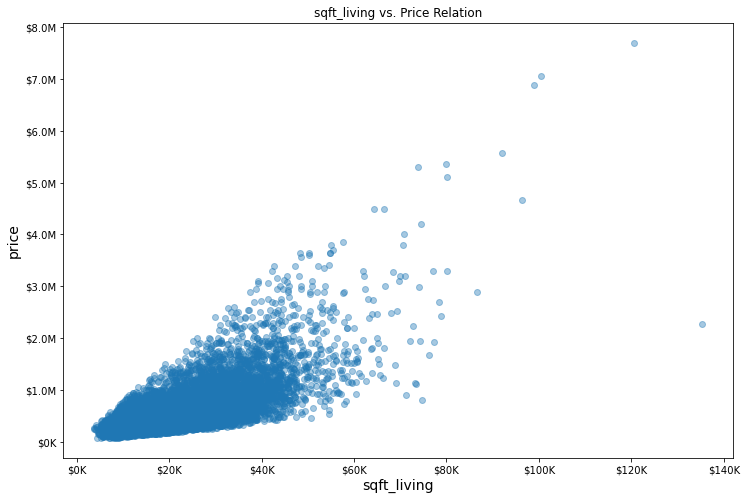

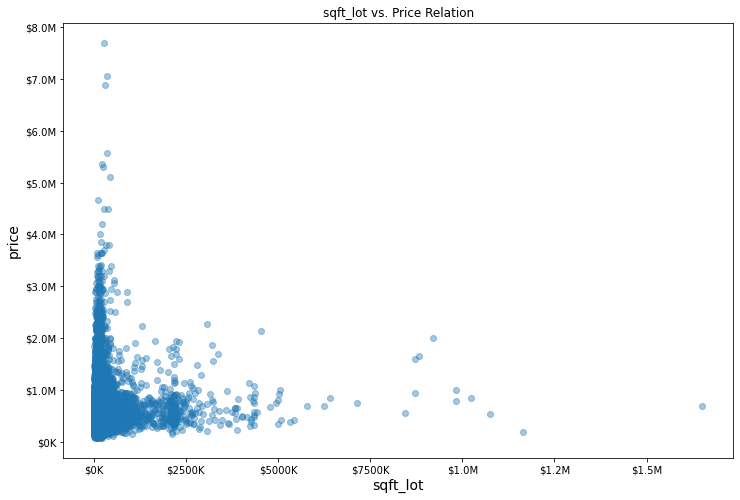

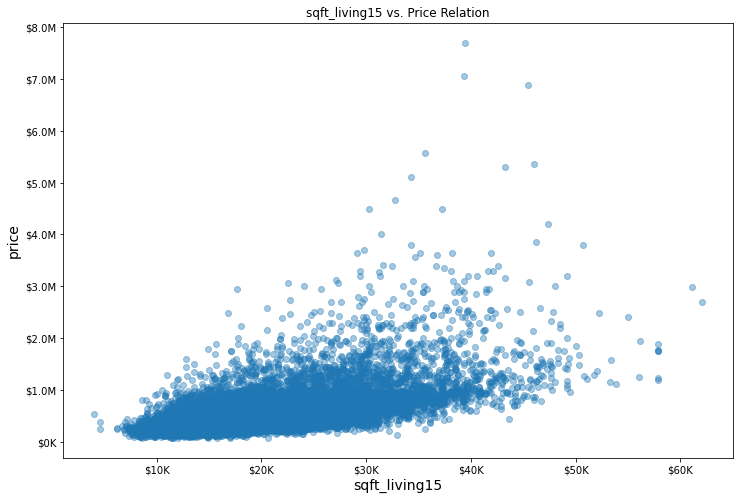

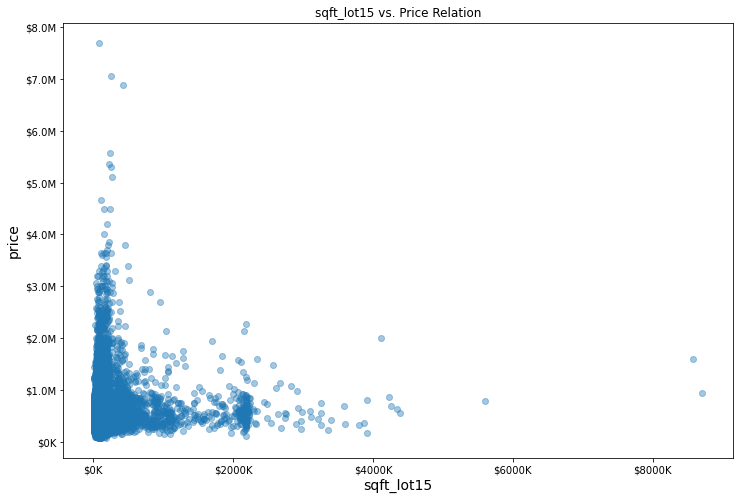

In [92]:
for column in ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']:
    fig , ax = plt.subplots(figsize=(12,8))
    ax.scatter(df[column], df.price ,alpha=.4)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('price',fontsize=14)
    ax.set_title(f'{column} vs. Price Relation')
    ax.yaxis.set_major_formatter(currency)
    ax.xaxis.set_major_formatter(currency)
    plt.show()

In [93]:
# Turning sqft_basement column to binary.
df1.sqft_basement[df1.sqft_basement!=0]=1

In [94]:
df1.yr_renovated[df1.yr_renovated!=0]=1

In [95]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1.0,1951,1.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,1.0,2008,0.0,98116,1330,1265
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,1410,1287


In [169]:
max(y)

3070000.0

## Train Test Split

In [96]:
y = df1['price']
X= df1.drop('price',axis=1)

In [97]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 200)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((15594, 16), (3899, 16), (15594,), (3899,))

## Caterogical Columns Cleaning

In [98]:
#Binning yr_built.
X_train.yr_built.describe()

built_bins=[1900,1930,1960,1990,2020]
labels=['1900_1930', '1930_1960','1960_1990','1990_2020']
bins_built= pd.cut(X_train['yr_built'], built_bins , labels=labels )
bins_built = bins_built.cat.as_unordered()
X_train.yr_built=bins_built


X_test.yr_built.describe()

built_bins=[1900,1930,1960,1990,2020]
labels=['1900_1930', '1930_1960','1960_1990','1990_2020']
bins_built= pd.cut(X_test['yr_built'], built_bins , labels=labels )
bins_built = bins_built.cat.as_unordered()
X_test.yr_built=bins_built

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [99]:
#Cleaning columns for one hot coding.
X_train=X_train.round({'floors': 0})
X_train.floors=X_train.floors.astype(int)
X_train.waterfront=X_train.waterfront.astype(int)
X_train.view=X_train.view.astype(int)

X_test=X_test.round({'floors': 0})
X_test.floors=X_test.floors.astype(int)
X_test.waterfront=X_test.waterfront.astype(int)
X_test.view=X_test.view.astype(int)

cat_list=['yr_built','condition','floors', 'bedrooms','zipcode','waterfront','view','sqft_basement','yr_renovated']

In [100]:
X_train_cat=pd.DataFrame()
for i in cat_list:
    X_train_cat[i]=X_train[i].astype('category')
    
X_test_cat=pd.DataFrame()
for i in cat_list:
    X_test_cat[i]=X_test[i].astype('category')

In [101]:
for i in cat_list:
    dummies=pd.get_dummies(X_train_cat[i],prefix=i, drop_first=True)
    X_train_cat=X_train_cat.join(dummies)
    X_train_cat.drop([i], axis=1, inplace=True)
    
    
for i in cat_list:
    dummies=pd.get_dummies(X_test_cat[i],prefix=i, drop_first=True)
    X_test_cat=X_test_cat.join(dummies)
    X_test_cat.drop([i], axis=1, inplace=True)

## Checking For Multicollinearity

In [102]:
x = df1.drop('price',axis=1)

In [103]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif["features"] = x.columns

print(vif)

     VIF Factor       features
0     26.624255       bedrooms
1     29.362066      bathrooms
2    117.563123    sqft_living
3      5.415732       sqft_lot
4     22.470049         floors
5      1.166984     waterfront
6      1.401658           view
7     33.992109      condition
8    153.619800          grade
9    105.384009     sqft_above
10     5.906777  sqft_basement
11  8692.639581       yr_built
12     1.154698   yr_renovated
13  8475.123295        zipcode
14    30.348331  sqft_living15
15     7.291422     sqft_lot15


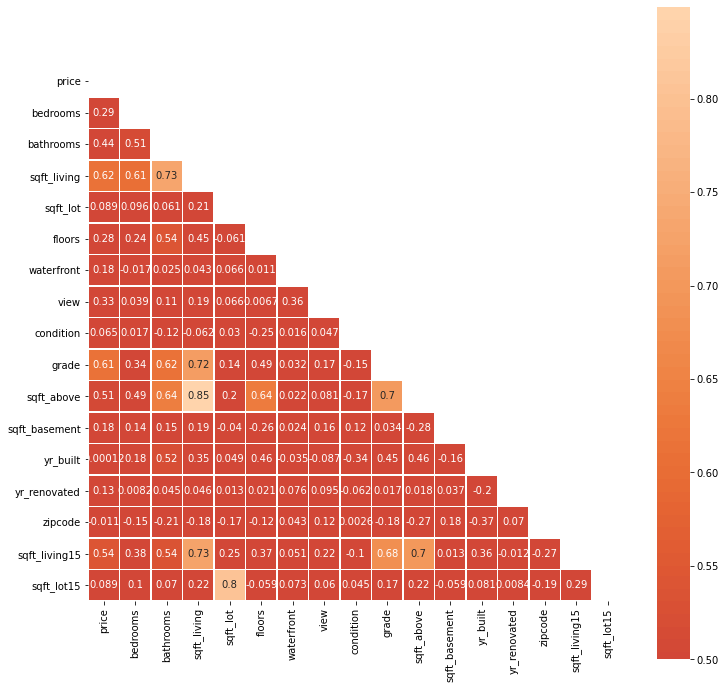

In [104]:
plt.figure(figsize=(12,12))
corr = df1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask ,annot=True, center=0, vmin=.5, square=True, linewidth=.5)
plt.show()

In [105]:
#Dropping most multicollinearity columns.
df1.drop(columns=['sqft_above','grade','bathrooms'],inplace=True)

In [106]:
cont_features =['sqft_living','sqft_lot','sqft_living15','sqft_lot15']

In [107]:
X_train_cont = X_train[cont_features]
X_test_cont = X_test[cont_features]

In [108]:
linreg = LinearRegression()
linreg.fit(X_train_cont,y_train)

LinearRegression()

In [109]:
linreg.score(X_train_cont,y_train)

0.4075005723470506

## Standardization

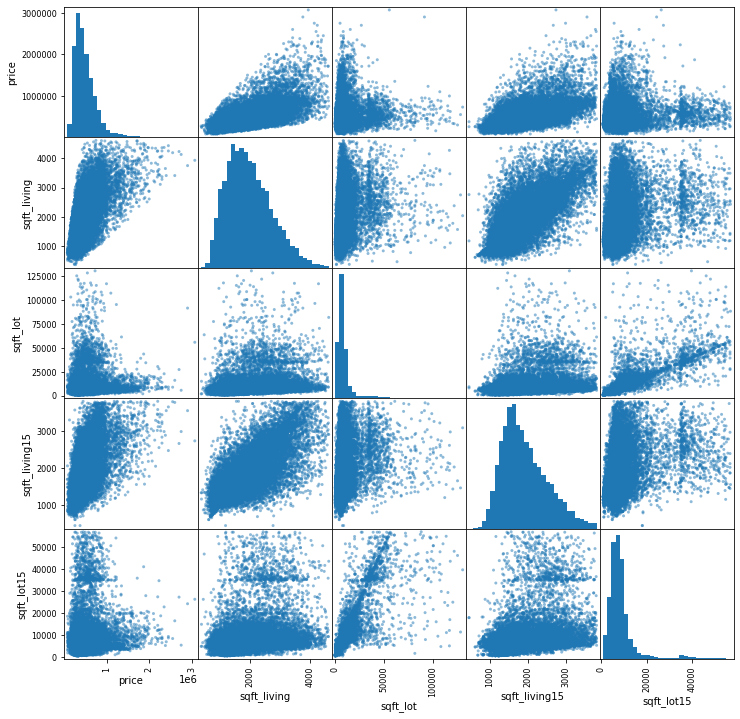

In [110]:
#Looking for each feature relation with each other.
df_cont=df1.loc[:,['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
pd.plotting.scatter_matrix(df_cont,hist_kwds={'bins':30},figsize=(12,12))
plt.show()

In [111]:
ss = StandardScaler()
X_train_cont_scaled = ss.fit_transform(X_train_cont)
X_test_cont_scaled = ss.transform(X_test_cont)

In [112]:
linreg_norm = LinearRegression()
linreg_norm.fit(X_train_cont_scaled,y_train)

LinearRegression()

In [113]:
linreg_norm.score(X_train_cont_scaled,y_train)

0.4075005723470507

In [114]:
print('Train Continuous MSE:',mean_squared_error(y_train, linreg_norm.predict(X_train_cont_scaled)))

Train Continuous MSE: 42295490957.8112


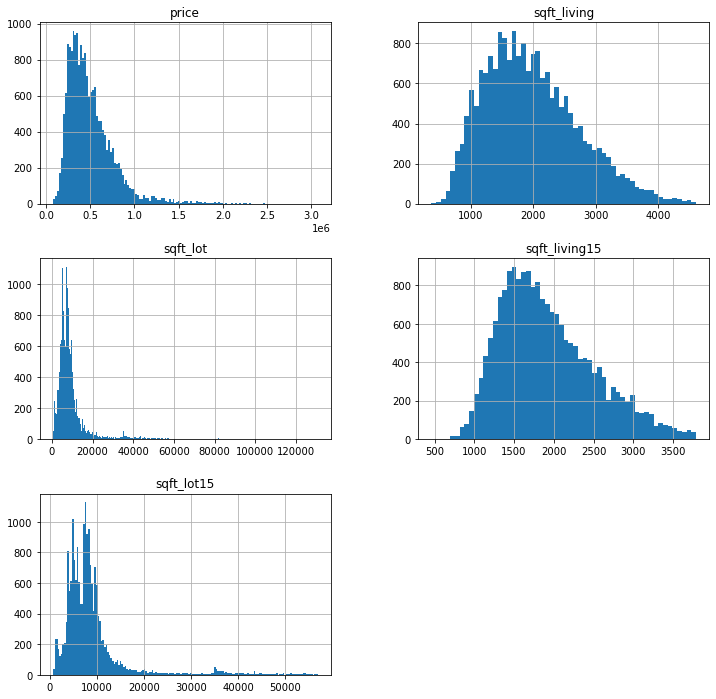

In [115]:
df_cont.hist(bins='auto',figsize=(12,12))
plt.show()

In [116]:
X_train_cont

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
7240,2820,5056,2820,5150
20524,1300,1362,1300,1251
11154,2680,9928,2180,10478
11323,3400,5222,3190,5326
8885,1200,12500,1200,7500
...,...,...,...,...
9905,1740,13750,2540,14300
15318,1650,7775,1390,7200
869,2180,8240,2050,7590
14125,1450,7245,1660,7800


In [117]:
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled , columns=X_train_cont.columns)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled , columns=X_test_cont.columns)

In [118]:
X_train_cat.reset_index(inplace=True)
X_test_cat.reset_index(inplace=True)

In [119]:
X_train_cat

,index,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,floors_2,bedrooms_2,...,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,view_1,view_2,view_3,view_4,sqft_basement_1.0,yr_renovated_1.0
0,7240,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,20524,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,11154,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,11323,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8885,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589,9905,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15590,15318,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15591,869,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15592,14125,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
X_train_cat.drop(columns=['index'],inplace=True)
X_test_cat.drop(columns=['index'],inplace=True)

In [121]:
X_train_all = pd.concat([X_train_cont_scaled, X_train_cat], axis=1)
X_test_all = pd.concat([X_test_cont_scaled, X_test_cat], axis=1)

In [122]:
X_train_cont_scaled

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,1.144123,-0.457288,1.532824,-0.513581
1,-0.898842,-0.810764,-1.048093,-1.040159
2,0.955955,0.008911,0.446122,0.205990
3,1.923675,-0.441403,2.161073,-0.489812
4,-1.033247,0.255024,-1.217890,-0.196203
...,...,...,...,...
15589,-0.307457,0.374636,1.057392,0.722169
15590,-0.428422,-0.197108,-0.895276,-0.236719
15591,0.283927,-0.152613,0.225386,-0.184048
15592,-0.697233,-0.247824,-0.436823,-0.155686


In [123]:
X_train_cat

,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,floors_2,bedrooms_2,bedrooms_3,...,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,view_1,view_2,view_3,view_4,sqft_basement_1.0,yr_renovated_1.0
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
15590,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15591,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15592,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results


In [125]:
#Creating function to visualize homoscedasticity.
def visualize_homoscedasticity(model,features, label):
    df_results = calculate_residuals(model, features, label)
    
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

In [126]:
lin = LinearRegression()
lin.fit(X_train_all,y_train)

LinearRegression()

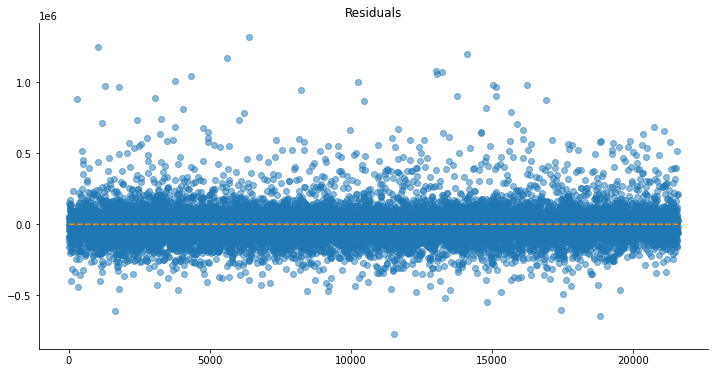

In [127]:
#Looking for train data homoscedasticity.
visualize_homoscedasticity(lin, X_train_all, y_train)

## Modeling

In [128]:
X_train_all

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,...,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,view_1,view_2,view_3,view_4,sqft_basement_1.0,yr_renovated_1.0
0,1.144123,-0.457288,1.532824,-0.513581,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.898842,-0.810764,-1.048093,-1.040159,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.955955,0.008911,0.446122,0.205990,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1.923675,-0.441403,2.161073,-0.489812,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.033247,0.255024,-1.217890,-0.196203,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15589,-0.307457,0.374636,1.057392,0.722169,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15590,-0.428422,-0.197108,-0.895276,-0.236719,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15591,0.283927,-0.152613,0.225386,-0.184048,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
15592,-0.697233,-0.247824,-0.436823,-0.155686,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
y_train = list(y_train)
X_train_all = sm.add_constant(X_train_all)


### First Model

In [130]:
model = sm.OLS(y_train,X_train_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     665.5
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:44:26   Log-Likelihood:            -2.0431e+05
No. Observations:               15594   AIC:                         4.088e+05
Df Residuals:                   15498   BIC:                         4.096e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.45e+05   2.91e+04      4.983      0.000     8.8e+04    2.02e+05
sqft_living         1.263e+05   1811.544     69.733      0.000    1.23e+05     1.3e+05
sqft_lot            1.191e+04   1599.092      7.445      0.000    8771.140     1.5e+04
sqft_living15       2.846e+04   1603.447     17.752      0.000    2.53e+04    3.16e+04
sqft_lot15         -1957.3038   1722.578     -1.136      0.256   -5333.758    1419.150
yr_built_1930_1960 -5923.2702   3801.145     -1.558      0.119   -1.34e+04    1527.418
yr_built_1960_1990 -4144.1810   4104.586     -1.010      0.313   -1.22e+04    3901.288
yr_built_1990_2020  1.322e+04   4368.479      3.026      0.002    4656.545    2.18e+04
condition_2         1.312e+05   2.88e+04      4.555      0.000    7.48e+04    1.88e+05
condition_3         1.417e+05   2.68e+04      5.282      0.000    8.91e+04    1.94e+05
condition_4         1.606e+05   2.68e+04      5.986      0.000    1.08e+05    2.13e+05
condition_5         2.026e+05    2.7e+04      7.507      0.000     1.5e+05    2.55e+05
floors_2           -1159.7511   2735.810     -0.424      0.672   -6522.258    4202.756
bedrooms_2          9518.6986   1.02e+04      0.935      0.350   -1.04e+04    2.95e+04
bedrooms_3          1.108e+04   1.01e+04      1.096      0.273   -8736.314    3.09e+04
bedrooms_4         -5178.3775   1.04e+04     -0.500      0.617   -2.55e+04    1.51e+04
bedrooms_5         -1.951e+04    1.1e+04     -1.770      0.077   -4.11e+04    2100.499
bedrooms_6         -5.428e+04   1.38e+04     -3.942      0.000   -8.13e+04   -2.73e+04
bedrooms_7         -1.398e+05   2.94e+04     -4.761      0.000   -1.97e+05   -8.22e+04
bedrooms_8         -7.139e+04   4.99e+04     -1.431      0.153   -1.69e+05    2.64e+04
zipcode_98002        1.38e+04    1.2e+04      1.152      0.249   -9684.121    3.73e+04
zipcode_98003       1.575e+04   1.06e+04      1.484      0.138   -5051.387    3.65e+04
zipcode_98004       7.201e+05   1.12e+04     64.532      0.000    6.98e+05    7.42e+05
zipcode_98005       3.568e+05    1.3e+04     27.426      0.000    3.31e+05    3.82e+05
zipcode_98006       2.919e+05   9866.949     29.581      0.000    2.73e+05    3.11e+05
zipcode_98007       2.865e+05   1.32e+04     21.632      0.000     2.6e+05    3.12e+05
zipcode_98008        2.58e+05   1.09e+04     23.586      0.000    2.37e+05    2.79e+05
zipcode_98010       6.715e+04   1.64e+04      4.090      0.000     3.5e+04    9.93e+04
zipcode_98011       1.438e+05   1.21e+04     11.853      0.000     1.2e+05    1.68e+05
zipcode_98014       1.052e+05   1.65e+04      6.376      0.000    7.28e+04    1.37e+05
zipcode_98019        7.14e+04   1.25e+04      5.693      0.000    4.68e+04     9.6e+04
zipcode_98022      -1.388e+04   1.21e+04     -1.144      0.253   -3.77e+04    9907.878
zipcode_98023      -5483.7788   9315.8

### Second Model

In [131]:
#Removing features with a pvalue < 0.05.
columns = model.pvalues[model.pvalues <= 0.05]
columns.index
model = sm.OLS(y_train, X_train_all[columns.index]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     848.3
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:44:26   Log-Likelihood:            -2.0437e+05
No. Observations:               15594   AIC:                         4.089e+05
Df Residuals:                   15519   BIC:                         4.095e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.48e+05   2.69e+04      5.499      0.000    9.53e+04    2.01e+05
sqft_living         1.204e+05   1524.511     78.971      0.000    1.17e+05    1.23e+05
sqft_lot            1.058e+04   1117.168      9.474      0.000    8394.395    1.28e+04
sqft_living15       2.843e+04   1578.765     18.006      0.000    2.53e+04    3.15e+04
yr_built_1990_2020  1.831e+04   2827.086      6.477      0.000    1.28e+04    2.39e+04
condition_2         1.303e+05   2.89e+04      4.515      0.000    7.37e+04    1.87e+05
condition_3         1.421e+05   2.68e+04      5.298      0.000    8.95e+04    1.95e+05
condition_4          1.61e+05   2.69e+04      5.994      0.000    1.08e+05    2.14e+05
condition_5         2.026e+05    2.7e+04      7.501      0.000     1.5e+05    2.56e+05
bedrooms_6         -5.012e+04   9112.675     -5.500      0.000    -6.8e+04   -3.23e+04
bedrooms_7         -1.368e+05   2.75e+04     -4.968      0.000   -1.91e+05   -8.28e+04
zipcode_98004       7.136e+05   8867.153     80.482      0.000    6.96e+05    7.31e+05
zipcode_98005       3.507e+05   1.12e+04     31.375      0.000    3.29e+05    3.73e+05
zipcode_98006       2.868e+05   7248.727     39.571      0.000    2.73e+05    3.01e+05
zipcode_98007       2.791e+05   1.14e+04     24.391      0.000    2.57e+05    3.02e+05
zipcode_98008         2.5e+05   8658.053     28.877      0.000    2.33e+05    2.67e+05
zipcode_98010       6.252e+04    1.5e+04      4.166      0.000    3.31e+04    9.19e+04
zipcode_98011       1.395e+05   1.01e+04     13.748      0.000     1.2e+05    1.59e+05
zipcode_98014       1.012e+05   1.51e+04      6.698      0.000    7.16e+04    1.31e+05
zipcode_98019       6.616e+04   1.06e+04      6.215      0.000    4.53e+04     8.7e+04
zipcode_98024       1.425e+05   2.19e+04      6.490      0.000    9.94e+04    1.85e+05
zipcode_98027       2.018e+05   7891.691     25.577      0.000    1.86e+05    2.17e+05
zipcode_98028       1.312e+05   8549.961     15.341      0.000    1.14e+05    1.48e+05
zipcode_98029       2.434e+05   7946.838     30.626      0.000    2.28e+05    2.59e+05
zipcode_98033       3.777e+05   7030.949     53.714      0.000    3.64e+05    3.91e+05
zipcode_98034       2.008e+05   6266.404     32.046      0.000    1.89e+05    2.13e+05
zipcode_98039       1.043e+06   2.69e+04     38.765      0.000     9.9e+05     1.1e+06
zipcode_98040       5.025e+05   9669.097     51.971      0.000    4.84e+05    5.21e+05
zipcode_98045       9.757e+04   1.01e+04      9.648      0.000    7.77e+04    1.17e+05
zipcode_98052       2.588e+05   6251.262     41.404      0.000    2.47e+05    2.71e+05
zipcode_98053       2.172e+05   7683.278     28.266      0.000    2.02e+05    2.32e+05
zipcode_98055       4.236e+04   8448.756      5.014      0.000    2.58e+04    5.89e+04
zipcode_98056       9.406e+04   7003.9

In [132]:
y_train = np.log(y_train)
y_test = np.log(y_test)

### Third Model

In [133]:
model= sm.OLS(y_train, X_train_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     949.2
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:44:26   Log-Likelihood:                 4183.0
No. Observations:               15594   AIC:                            -8174.
Df Residuals:                   15498   BIC:                            -7439.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.8934      0.045    261.873      0.000      11.804      11.982
sqft_living            0.2010      0.003     71.103      0.000       0.196       0.207
sqft_lot               0.0300      0.002     12.021      0.000       0.025       0.035
sqft_living15          0.0687      0.003     27.468      0.000       0.064       0.074
sqft_lot15            -0.0050      0.003     -1.867      0.062      -0.010       0.000
yr_built_1930_1960    -0.0302      0.006     -5.089      0.000      -0.042      -0.019
yr_built_1960_1990    -0.0120      0.006     -1.872      0.061      -0.025       0.001
yr_built_1990_2020     0.0482      0.007      7.069      0.000       0.035       0.062
condition_2            0.3319      0.045      7.380      0.000       0.244       0.420
condition_3            0.4673      0.042     11.165      0.000       0.385       0.549
condition_4            0.5152      0.042     12.299      0.000       0.433       0.597
condition_5            0.5726      0.042     13.596      0.000       0.490       0.655
floors_2               0.0084      0.004      1.972      0.049    5.01e-05       0.017
bedrooms_2             0.0927      0.016      5.831      0.000       0.062       0.124
bedrooms_3             0.1320      0.016      8.369      0.000       0.101       0.163
bedrooms_4             0.1232      0.016      7.615      0.000       0.091       0.155
bedrooms_5             0.0830      0.017      4.825      0.000       0.049       0.117
bedrooms_6             0.0495      0.021      2.301      0.021       0.007       0.092
bedrooms_7            -0.0881      0.046     -1.922      0.055      -0.178       0.002
bedrooms_8            -0.0862      0.078     -1.107      0.268      -0.239       0.066
zipcode_98002         -0.0218      0.019     -1.165      0.244      -0.058       0.015
zipcode_98003          0.0531      0.017      3.203      0.001       0.021       0.086
zipcode_98004          1.1629      0.017     66.761      0.000       1.129       1.197
zipcode_98005          0.8052      0.020     39.653      0.000       0.765       0.845
zipcode_98006          0.6805      0.015     44.183      0.000       0.650       0.711
zipcode_98007          0.7190      0.021     34.787      0.000       0.679       0.760
zipcode_98008          0.6784      0.017     39.738      0.000       0.645       0.712
zipcode_98010          0.1922      0.026      7.499      0.000       0.142       0.242
zipcode_98011          0.4738      0.019     25.022      0.000       0.437       0.511
zipcode_98014          0.2934      0.026     11.398      0.000       0.243       0.344
zipcode_98019          0.2947      0.020     15.053      0.000       0.256       0.333
zipcode_98022          0.0054      0.019      0.287      0.774      -0.032       0.043
zipcode_98023         -0.0025      0.0

### Final Model

In [134]:
columns = model.pvalues[model.pvalues <= 0.05]
columns.index
model = sm.OLS(y_train, X_train_all[columns.index]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1048.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:44:26   Log-Likelihood:                 4174.2
No. Observations:               15594   AIC:                            -8174.
Df Residuals:                   15507   BIC:                            -7509.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.8778      0.044    270.209      0.000      11.792      11.964
sqft_living            0.1996      0.003     71.482      0.000       0.194       0.205
sqft_lot               0.0269      0.002     15.305      0.000       0.023       0.030
sqft_living15          0.0689      0.002     27.905      0.000       0.064       0.074
yr_built_1930_1960    -0.0226      0.004     -5.302      0.000      -0.031      -0.014
yr_built_1990_2020     0.0592      0.005     12.340      0.000       0.050       0.069
condition_2            0.3279      0.045      7.293      0.000       0.240       0.416
condition_3            0.4611      0.042     11.028      0.000       0.379       0.543
condition_4            0.5093      0.042     12.167      0.000       0.427       0.591
condition_5            0.5681      0.042     13.494      0.000       0.486       0.651
floors_2               0.0096      0.004      2.260      0.024       0.001       0.018
bedrooms_2             0.1047      0.015      7.104      0.000       0.076       0.134
bedrooms_3             0.1434      0.014      9.907      0.000       0.115       0.172
bedrooms_4             0.1356      0.015      9.142      0.000       0.107       0.165
bedrooms_5             0.0961      0.016      6.048      0.000       0.065       0.127
bedrooms_6             0.0617      0.020      3.029      0.002       0.022       0.102
zipcode_98003          0.0512      0.013      3.807      0.000       0.025       0.078
zipcode_98004          1.1615      0.014     80.341      0.000       1.133       1.190
zipcode_98005          0.8025      0.018     44.963      0.000       0.767       0.837
zipcode_98006          0.6787      0.012     56.797      0.000       0.655       0.702
zipcode_98007          0.7161      0.018     39.284      0.000       0.680       0.752
zipcode_98008          0.6767      0.014     48.199      0.000       0.649       0.704
zipcode_98010          0.1873      0.024      7.904      0.000       0.141       0.234
zipcode_98011          0.4719      0.016     28.982      0.000       0.440       0.504
zipcode_98014          0.2895      0.024     12.137      0.000       0.243       0.336
zipcode_98019          0.2928      0.017     17.160      0.000       0.259       0.326
zipcode_98024          0.4103      0.034     11.926      0.000       0.343       0.478
zipcode_98027          0.5570      0.013     43.049      0.000       0.532       0.582
zipcode_98028          0.4373      0.014     31.481      0.000       0.410       0.464
zipcode_98029          0.6491      0.013     49.754      0.000       0.624       0.675
zipcode_98030          0.0688      0.014      4.800      0.000       0.041       0.097
zipcode_98031          0.0767      0.013      5.684      0.000       0.050       0.103
zipcode_98033          0.8127      0.0

## Assumptions 

### Linearity 

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

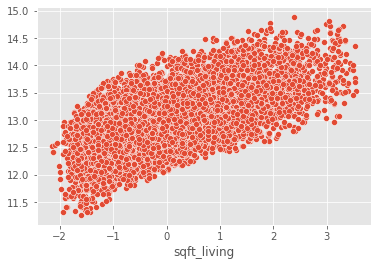

In [170]:
sns.scatterplot(X_train_all['sqft_living'],y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living'>

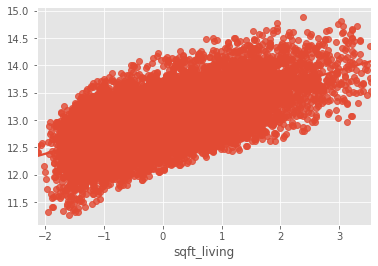

In [171]:
sns.regplot(X_train_all['sqft_living'],y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr_built_1990_2020'>

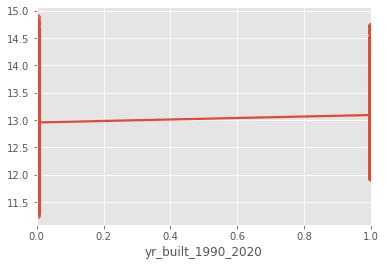

In [172]:
# 0.05 coef feature.
sns.regplot(X_train_all['yr_built_1990_2020'],y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zipcode_98039'>

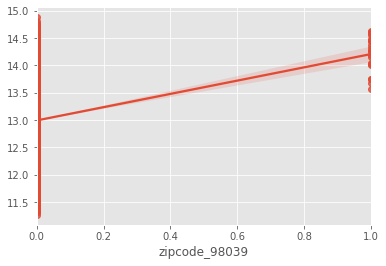

In [173]:
# 1.32 coef feature.
sns.regplot(X_train_all['zipcode_98039'],y_train)


### Normality

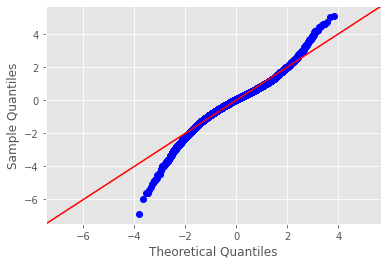

In [174]:
sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True);

### Homoscedasticity

<ErrorbarContainer object of 3 artists>

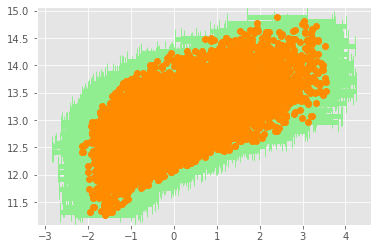

In [175]:
plt.errorbar(X_train_all['sqft_living'], y_train, xerr = 0.7, fmt = 'o',color = 'darkorange', 
            ecolor = 'lightgreen', elinewidth = 5, capsize=10)

<ErrorbarContainer object of 3 artists>

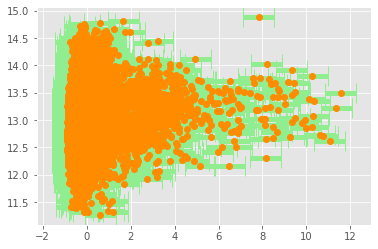

In [176]:
plt.errorbar(X_train_all['sqft_lot'], y_train, xerr = 0.7, fmt = 'o',color = 'darkorange', 
            ecolor = 'lightgreen', elinewidth = 5, capsize=10)

In [184]:
durbin_watson(model.resid)

1.983068964206881

Since our test statistic is 1.98 is close to 2 we would consider autocorrelation not to be problematic in this model.

### OverFitting

In [177]:
lin1 = LinearRegression()
lin1.fit(X_train_all, y_train)

LinearRegression()

In [178]:
y_pred = lin1.predict(X_train_all)

In [179]:
y_pred

array([12.99843433, 12.91419913, 13.27257945, ..., 12.54159385,
       12.97982737, 12.2239097 ])

In [180]:
train_mae = metrics.mean_absolute_error(y_train, y_pred)
train_mse = metrics.mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse) # or mse**(0.5)  
train_r2 = metrics.r2_score(y_train,y_pred)

print("Results of training data:")
print("MAE:",train_mae)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R-Squared:", train_r2)


Results of training data:
MAE: 0.1363197041990764
MSE: 0.03423994819692477
RMSE: 0.18504039612183273
R-Squared: 0.8533330665903632


In [181]:
lin2 = LinearRegression()
lin2.fit(X_test_all,y_test)

LinearRegression()

In [182]:
y_test_pred = lin2.predict(X_test_all)
y_test_pred

array([13.22257127, 12.1978497 , 12.54462524, ..., 12.62826954,
       12.50143755, 12.41358401])

In [183]:
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse) # or mse**(0.5)  
test_r2 = metrics.r2_score(y_test,y_test_pred)

print("Results of tests data:")
print("MAE:",test_mae)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R-Squared:", test_r2)

Results of tests data:
MAE: 0.1340619281055785
MSE: 0.032979305549513685
RMSE: 0.18160205271283056
R-Squared: 0.8611860799858145


From the results there is no overfitting.

## Conclusion

In conclusion , built model is predictive of price with a R-squared 0.85. So 85 % of the variations are explained by our model. Final model included 86 variables, most of them one hot encoded columns. 

**Findings** ; 
1. Square Feet Living : 
 - Sqft_living coefficient is 0.1996 , which means that for every 100 feet added sqft_living , price increases **1.9%**. We expect this to be the case where house gets bigger , price also increase.
 
2. Condition: 
 - Condition_5 coefficient is 0.5681 which is highest in condition. It says if the house has 5 condition rate price will be increase **5.6%** .
 
3. Location:
 - For location our model shows zipcode_98039 location are the highest coefficient as 1.3214. If the new house will be in this zipcode price will be increase **13.2%.** 
 
4. View: 
 - If the house has more views price will be increase. As our model says ; fourth times viewed house price will be increase **%3.5**.

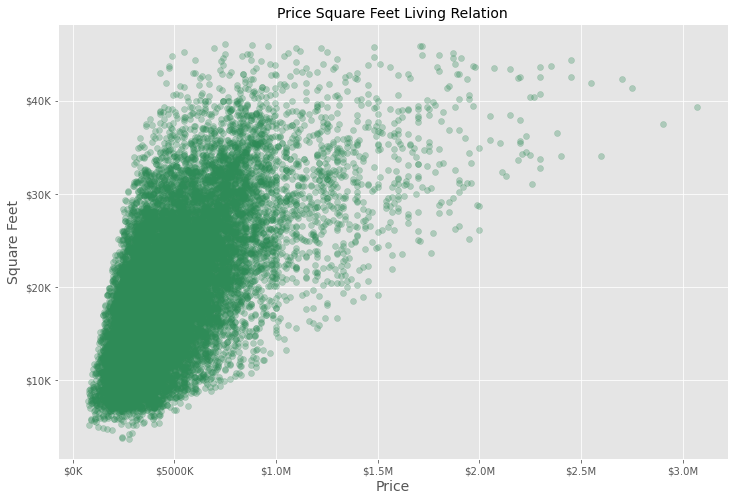

In [149]:
fig ,ax = plt.subplots(figsize=(12,8))
plt.scatter(df1.price,df1['sqft_living'],c='seagreen',alpha=.3)
ax.set_xlabel('Price',fontsize=14)
ax.set_ylabel('Square Feet',fontsize=14)
ax.set_title('Price Square Feet Living Relation',fontsize=14)
ax.yaxis.set_major_formatter(currency)
ax.xaxis.set_major_formatter(currency)
plt.style.use('ggplot')
plt.show()


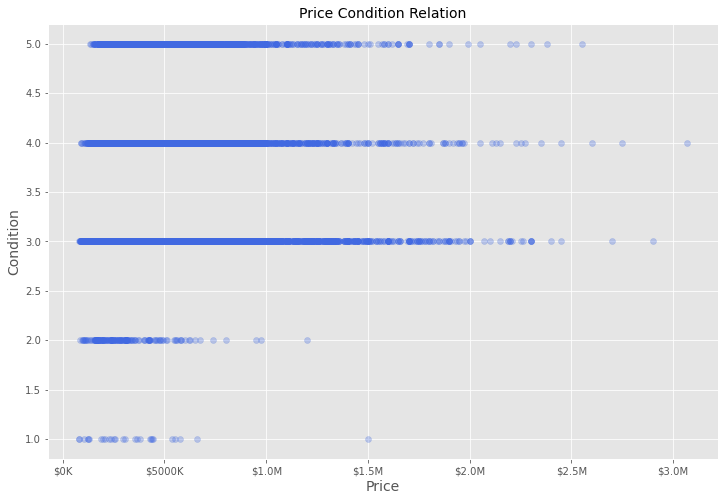

In [158]:
fig ,ax = plt.subplots(figsize=(12,8))
plt.scatter(df1.price,df1['condition'],c='royalblue',alpha=.3)
ax.set_xlabel('Price',fontsize=14)
ax.set_ylabel('Condition',fontsize=14)
ax.set_title('Price Condition Relation',fontsize=14)
ax.xaxis.set_major_formatter(currency)
plt.style.use('ggplot')
plt.show()


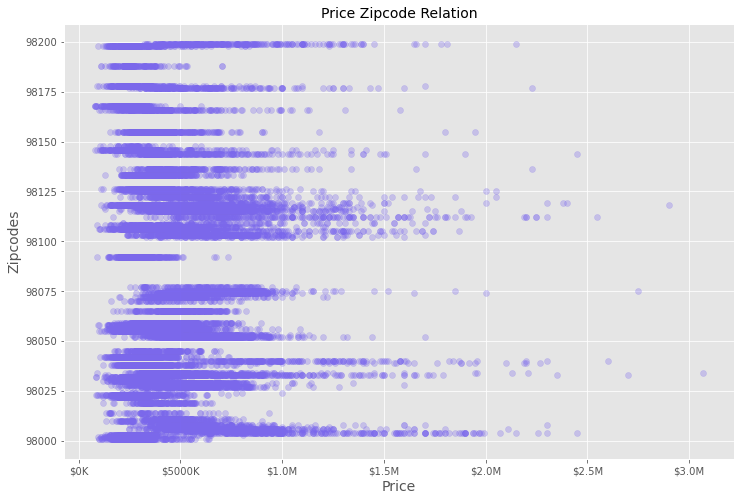

In [162]:
fig ,ax = plt.subplots(figsize=(12,8))
plt.scatter(df1.price,df1['zipcode'],c='mediumslateblue',alpha=.3)
ax.set_xlabel('Price',fontsize=14)
ax.set_ylabel('Zipcodes',fontsize=14)
ax.set_title('Price Zipcode Relation',fontsize=14)
ax.xaxis.set_major_formatter(currency)
plt.style.use('ggplot')
plt.show()


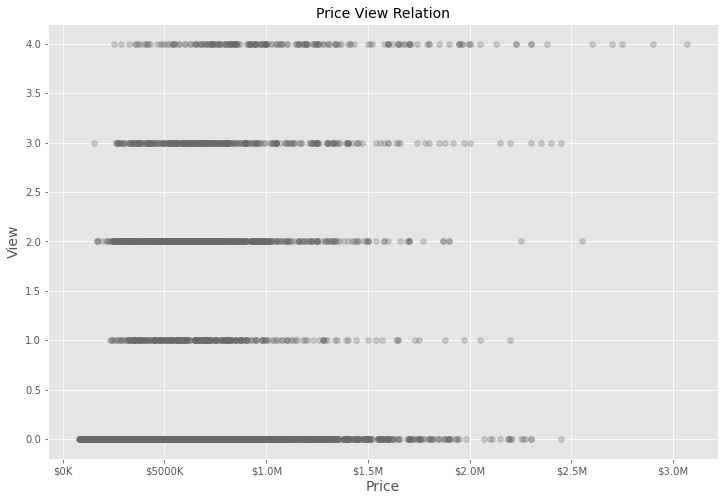

In [166]:
fig ,ax = plt.subplots(figsize=(12,8))
plt.scatter(df1.price,df1['view'],c='dimgray',alpha=.3)
ax.set_xlabel('Price',fontsize=14)
ax.set_ylabel('View',fontsize=14)
ax.set_title('Price View Relation',fontsize=14)
ax.xaxis.set_major_formatter(currency)
plt.style.use('ggplot')
plt.show()


## Future Work

For future work for this model could be work on location with latitude,longitude  for precise location for better modeling. And gather more data on construction spendings that how those will effect on house building.